# <center> MATH&ML-11. Кластеризация и техники понижения размерности. Часть II. Практический раздел

In [53]:
# Импорты

import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn import cluster
from sklearn import preprocessing
from sklearn import decomposition

import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
#Задание 4.1
train_data = np.loadtxt('data/physical_activity_data/train.txt')
test_data = np.loadtxt('data/physical_activity_data/test.txt')
train_labels = np.loadtxt('data/physical_activity_data/train_labels.txt')
test_labels = np.loadtxt('data/physical_activity_data/test_labels.txt')

data = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)
print('Размерность выборки:', data.shape)

Размерность выборки: (10299, 561)


In [33]:
data

array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
         0.17994061, -0.05862692],
       [ 0.27841883, -0.01641057, -0.12352019, ..., -0.8447876 ,
         0.18028889, -0.05431672],
       [ 0.27965306, -0.01946716, -0.11346169, ..., -0.84893347,
         0.18063731, -0.04911782],
       ...,
       [ 0.34996609,  0.03007744, -0.11578796, ..., -0.65535684,
         0.27447878,  0.18118355],
       [ 0.23759383,  0.01846687, -0.09649893, ..., -0.65971859,
         0.26478161,  0.18756291],
       [ 0.15362719, -0.01843651, -0.13701846, ..., -0.66008023,
         0.26393619,  0.1881034 ]])

In [34]:
# Задание 4.2

np.unique(labels)

array([1., 2., 3., 4., 5., 6.])

Расшифровка меток (кластеров):

1 — ходьба;

2 — подъём;

3 — спуск;

4 — сидение;

5 — стояние;

6 — лежание.

In [35]:
#Задание 4.3

scaler = preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(data)
print('Значение первого значения первого признака:', np.round(data_scaled[0][0], 2))

Значение первого значения первого признака: 0.21


,silhouette,cluster
0,0.393732,2
1,0.316517,3
2,0.278265,4
3,0.259672,5
4,0.117070,6
5,0.101209,7
6,0.091992,8
7,0.082670,9


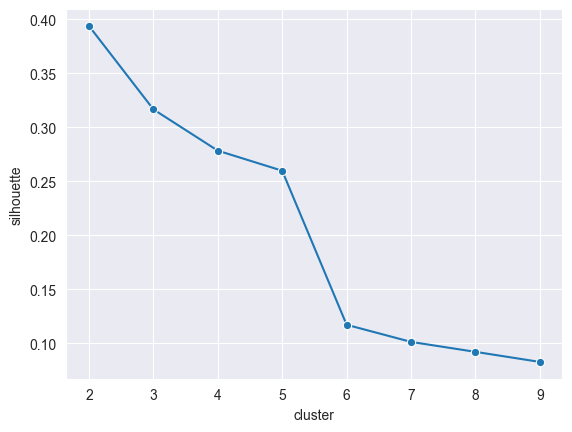

In [36]:
#Задание 4.4
#Коэффициент силуэта

# kmeans_model = cluster.KMeans(random_state=42, init='k-means++')
# pred = kmeans_model.fit_predict(data_scaled)

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means = cluster.KMeans(n_clusters=cluster_num, init='k-means++', random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = metrics.silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, data_scaled))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

silhouette_df

,kh_index,cluster
0,7880.813904,2
1,5034.470018,3
2,3668.017373,4
3,2845.838894,5
4,2504.685859,6
5,2171.068984,7
6,1890.890052,8
7,1685.013483,9


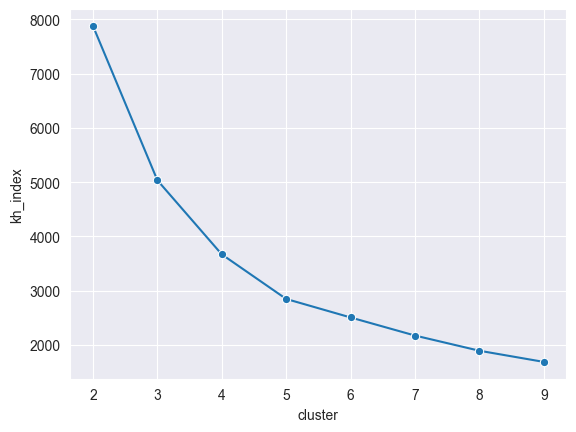

In [37]:
#Индекс Калински-Харабаса

def get_calinski_harabasz_score(cluster_num, X):
    k_means = cluster.KMeans(n_clusters=cluster_num, init='k-means++', random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    kh_index = metrics.calinski_harabasz_score(X, k_means.predict(X))
    return kh_index

# создадим пустой словарь, ключами будут инерция и количество кластеров
kh_res = {"kh_index": [], "cluster": []}

for cluster_num in range(2, 10):
    kh_res["kh_index"].append(get_calinski_harabasz_score(cluster_num, data_scaled))
    kh_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
kh_df = pd.DataFrame(kh_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=kh_df, x="cluster", y="kh_index", marker= "o")

kh_df

,db_index,cluster
0,1.070744,2
1,1.783821,3
2,2.046438,4
3,2.266485,5
4,2.525999,6
5,2.650286,7
6,2.619036,8
7,2.759386,9


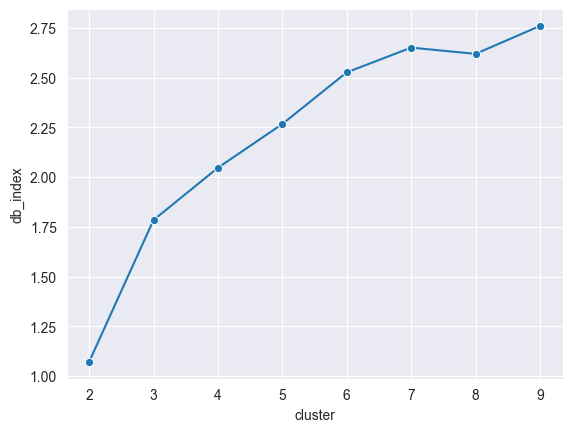

In [38]:
#Индекс Дэвиса-Болдина

def get_davies_bouldin_score(cluster_num, X):
    k_means = cluster.KMeans(n_clusters=cluster_num, init='k-means++', random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    db_index = metrics.davies_bouldin_score(X, k_means.predict(X))
    return db_index

# создадим пустой словарь, ключами будут инерция и количество кластеров
db_res = {"db_index": [], "cluster": []}

for cluster_num in range(2, 10):
    db_res["db_index"].append(get_davies_bouldin_score(cluster_num, data_scaled))
    db_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
db_df = pd.DataFrame(db_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=db_df, x="cluster", y="db_index", marker= "o")

db_df

In [39]:
#Эталон

#проходимся циклом по всем нужным нам значениям количества кластеров
for i in range(2,10):
	# обучаем модель k-means с текущим количеством кластеров
    km = cluster.KMeans(n_clusters = i , random_state = 42 ).fit(data_scaled)
	#предсказываем метки
    y_pred = km.labels_
	#выводим результат для коэффициента силуэта
    print (i, metrics.silhouette_score(data_scaled,  y_pred))
for i in range(2,10):
    km = cluster.KMeans(n_clusters = i , random_state = 42 ).fit(data_scaled)
    y_pred= km.labels_
    print (i, metrics.calinski_harabasz_score(data_scaled,y_pred))
for i in range(2,10):
    km = cluster.KMeans(n_clusters = i , random_state = 42 ).fit(data_scaled)
    y_pred = km.labels_
    print (i, metrics.davies_bouldin_score(data_scaled, y_pred))

KeyboardInterrupt: 

In [ ]:
#Задание 4.5

#Однородность
kmeans_model = cluster.KMeans(init='random', n_clusters=6, random_state=42)
pred = kmeans_model.fit_predict(data_scaled)
print('Однородность:', np.round(metrics.homogeneity_score(labels_true=labels, labels_pred=pred), 2))

#Полнота
kmeans_model = cluster.KMeans(init='random', n_clusters=6, random_state=42)
pred = kmeans_model.fit_predict(data_scaled)
print('Полнота:', np.round(metrics.completeness_score(labels_true=labels, labels_pred=pred), 2))

#ARI
kmeans_model = cluster.KMeans(init='random', n_clusters=6, random_state=42)
pred = kmeans_model.fit_predict(data_scaled)
print('Скорректированный индекс Рэнда:', np.round(metrics.adjusted_rand_score(labels_true=labels, labels_pred=pred), 2))

Однородность: 0.54
Полнота: 0.58
Скорректированный индекс Рэнда: 0.42


In [ ]:
# Задание 4.6

df = pd.crosstab(labels, pred)
df.index = ['ходьба', 'подъём', 
            'спуск', 'сидение', 'стояние', 'лежание']
df.columns = list(range(1,7))

df

,1,2,3,4,5,6
ходьба,741,897,0,0,84,0
подъём,297,1236,2,0,9,0
спуск,882,310,0,0,214,0
сидение,0,1,447,91,0,1238
стояние,0,0,560,0,0,1346
лежание,0,5,329,1556,0,54


In [ ]:
# Задание 4.7

kmeans_model = cluster.KMeans(init='random', n_clusters=2, random_state=42)
pred = kmeans_model.fit_predict(data_scaled)

df = pd.crosstab(labels, pred)
df.index = ['ходьба', 'подъём', 
            'спуск', 'сидение', 'стояние', 'лежание']
df.columns = list(range(1,3))

df

,1,2
ходьба,1722,0
подъём,1536,8
спуск,1406,0
сидение,3,1774
стояние,0,1906
лежание,12,1932


In [ ]:
#Задание 4.8

round(metrics.completeness_score(labels, pred), 2)

0.98

In [ ]:
#Задание 4.10

AC_model = cluster.AgglomerativeClustering(n_clusters=2)
pred = AC_model.fit_predict(data_scaled)

round(metrics.completeness_score(labels, pred), 2)

1.0

### Юнит 7. Снижение размерности. Практика

In [40]:
country_data = pd.read_csv('data/Country-data.zip')
country_data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


country — название страны;

child_mort — показатель смертности детей до 5 лет;

exports — показатель экспорта на душу населения;

health — показатель затрат на здравоохранение на душу населения;

imports — показатель импорта на душу населения;

Income — средний доход на душу населения;

Inflation — годовой показатель инфляции;

life_expec — средняя продолжительность жизни;

total_fer — суммарный коэффициент рождаемости;

gdpp — значение ВВП на душу населения.

In [41]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [45]:
#Сразу дроп страны, он не подразумевается в заданиях
country_data_with_country = country_data.copy()
country_data = country_data.drop('country', axis=1)

In [46]:
#Задание 7.1
print('Максимальная средняя продолжительность жизни \n', 
      country_data['life_expec'].max())
print('Минимальная средняя продолжительность жизни \n', 
      country_data['life_expec'].min())

Максимальная средняя продолжительность жизни 
 82.8
Минимальная средняя продолжительность жизни 
 32.1


In [47]:
# Задание 7.2
scaler = preprocessing.StandardScaler()
country_data_scaled = scaler.fit_transform(country_data)
round(country_data_scaled[0][0], 2)

1.29

<Axes: >

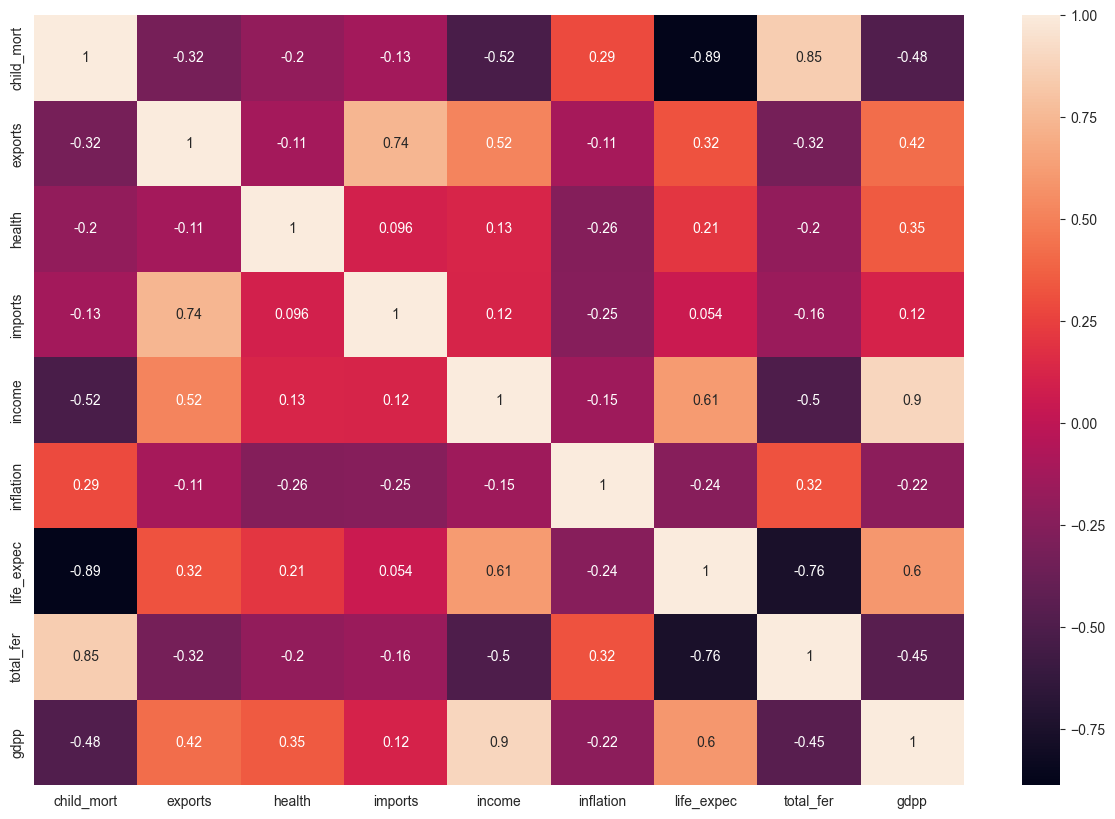

In [54]:
#Задание 7.3

plt.figure(figsize=(15,10))
sns.heatmap(country_data.corr(), annot=True)

In [69]:
#Задание 7.4
pca = decomposition.PCA(n_components=0.9)
country_data_decomponized = pca.fit_transform(country_data_scaled)
country_data_decomponized.shape

(167, 5)

In [70]:
#Задание 7.5
print('Самый важный признак объясняет', 
      np.round(pca.explained_variance_ratio_[0]*100, 2), '% выборки')

Самый важный признак объясняет 45.95 % выборки


,0,1,2,3,4
0,1.000000e+00,2.602576e-16,9.065228e-19,7.997363e-17,-1.464021e-16
1,2.602576e-16,1.000000e+00,5.102305e-17,3.585931e-16,-1.354977e-16
2,9.065228e-19,5.102305e-17,1.000000e+00,-3.588898e-16,1.963384e-16
3,7.997363e-17,3.585931e-16,-3.588898e-16,1.000000e+00,2.345415e-16
4,-1.464021e-16,-1.354977e-16,1.963384e-16,2.345415e-16,1.000000e+00


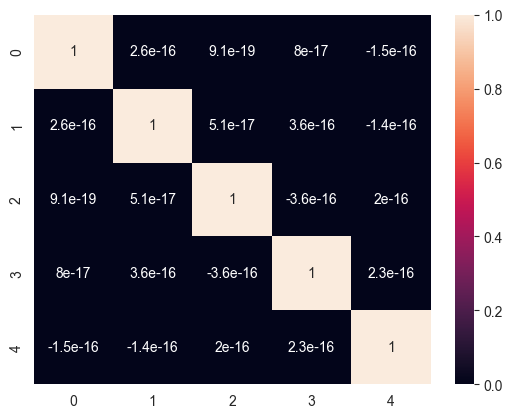

In [ ]:
#Задение 7.6
for_visualization = pd.DataFrame(country_data_decomponized)
sns.heatmap(for_visualization.corr(), annot=True)
for_visualization.corr()

,silhouette,cluster
0,0.284940,2
1,0.307977,3
2,0.320414,4
3,0.247967,5
4,0.234871,6
5,0.244125,7
6,0.239855,8
7,0.233192,9
8,0.227594,10


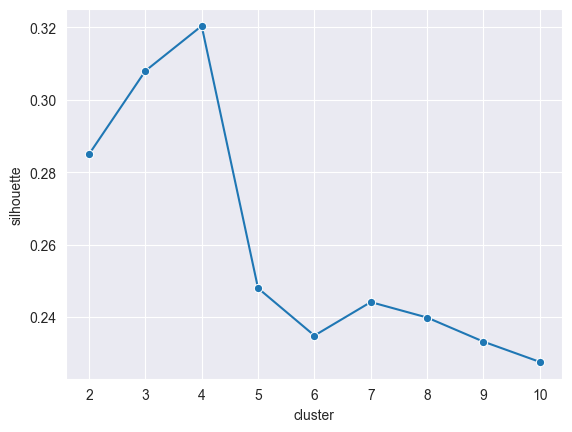

In [72]:
# Задание 7.7
def get_silhouette(cluster_num, X):
    k_means = cluster.KMeans(n_clusters=cluster_num, init='k-means++', random_state=1)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = metrics.silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(2, 11):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, country_data_decomponized))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

silhouette_df

                 gdpp  child_mort
cluster                          
0         1902.916667   92.366667
1        50062.500000    6.937500
2        44317.391304    4.252174
3         7430.386364   20.502273


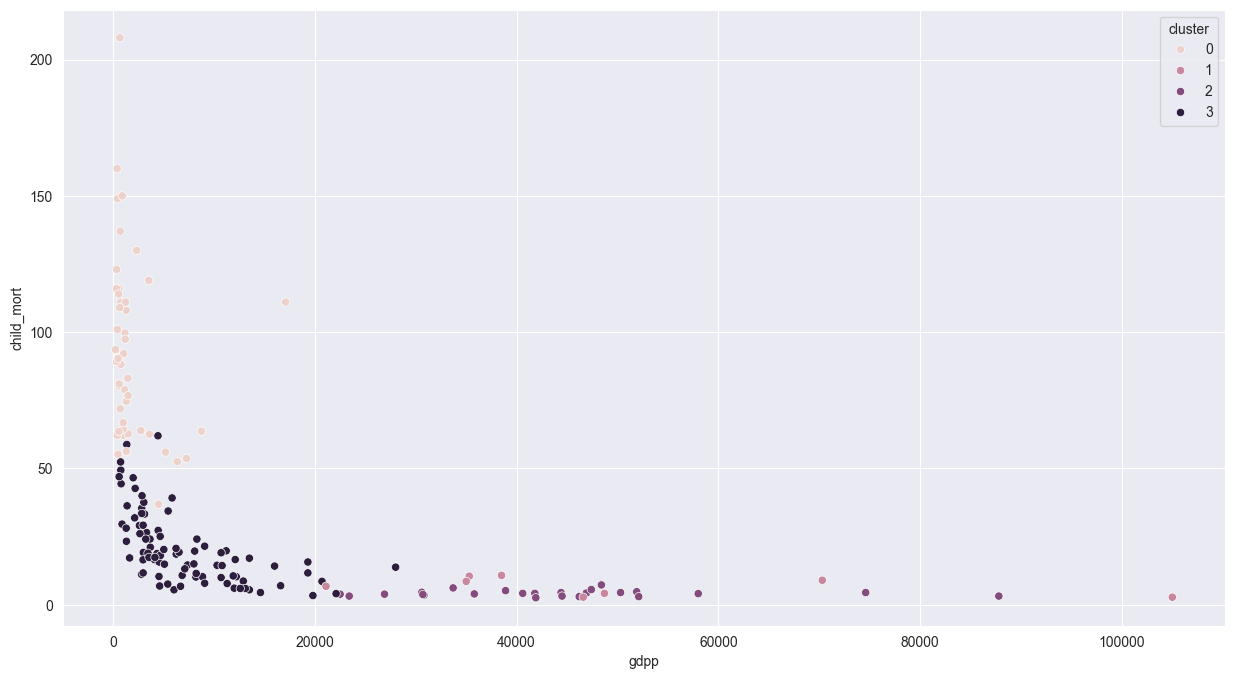

In [74]:
#Задание 7.8
kmeans_model = cluster.KMeans(random_state=1, n_clusters=4)
predictions = kmeans_model.fit_predict(country_data_decomponized)

country_data_with_country['cluster'] = predictions
plt.figure(figsize=(15,8))
sns.scatterplot(country_data_with_country, x='gdpp', y='child_mort', hue='cluster')

print(country_data_with_country.groupby('cluster')[['gdpp', 'child_mort']].mean())

In [79]:
#Задание 7.9
mask = country_data_with_country[country_data_with_country['cluster'] == 0]
display(mask.sort_values(by='life_expec', ascending=True).head(5))

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,0
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170,0
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,0
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460,0
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459,0
